In [125]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_iris


In [127]:
import warnings as wr
wr.filterwarnings("ignore")

In [129]:
iris = load_iris()

In [131]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

print(df.head())

print(f"Dataset shape: {df.shape}")
print("\nfeature names:")
print(iris.feature_names)
print("\nTarget names:")
print(iris.target_names)


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
Dataset shape: (150, 4)

feature names:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Target names:
['setosa' 'versicolor' 'virginica']


In [133]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [25]:
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [137]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [139]:
df.shape

(150, 4)

In [141]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [143]:
df.duplicated().sum()

1

In [145]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [147]:
for i  in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print("***"*15)

In [149]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,149.000000,149.000000,149.000000,149.000000
mean,5.843624,3.059732,3.748993,1.194631
std,0.830851,0.436342,1.767791,0.762622
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [151]:
kmeans = KMeans(n_clusters=3, random_state=45)
df["KMeans_Cluster"] = kmeans.fit_predict(df)


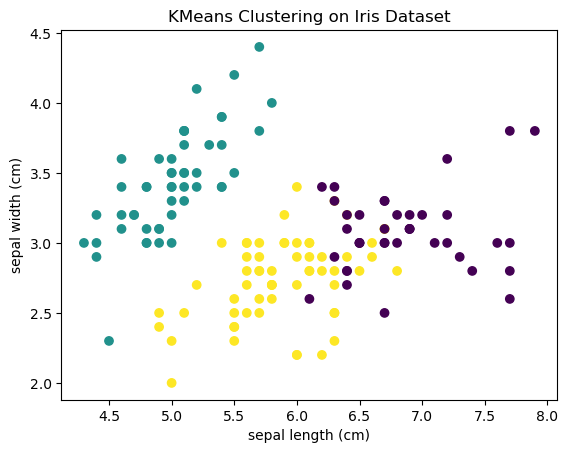

<Figure size 800x600 with 0 Axes>

In [153]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=df["KMeans_Cluster"], cmap="viridis")
plt.title("KMeans Clustering on Iris Dataset")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.figure(figsize=(8,6))
plt.show()

In [155]:
print("Cluster Centers:\n", kmeans.cluster_centers_)

Cluster Centers:
 [[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.006      3.428      1.462      0.246     ]
 [5.885      2.74166667 4.37666667 1.42666667]]


In [157]:
Z = linkage(df.iloc[:,:-1], method="ward")


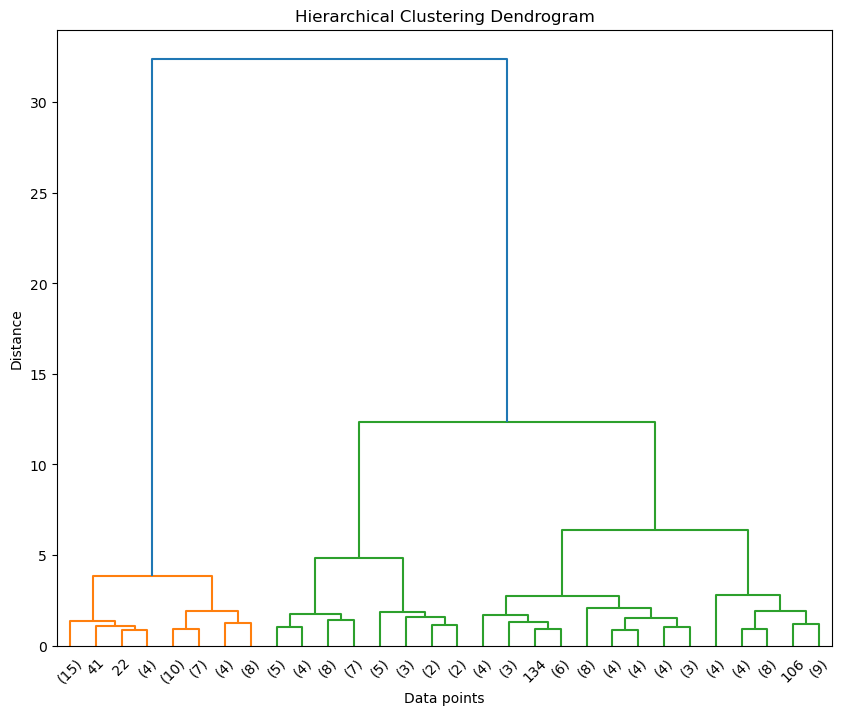

In [159]:
plt.figure(figsize=(10,8))
dendrogram(Z, truncate_mode= "lastp", p=30)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data points")
plt.ylabel("Distance")
plt.show()


In [161]:
hierarchical = AgglomerativeClustering(n_clusters=3)
df["Hierarchical_Cluster"] = hierarchical.fit_predict(df.iloc[:,:-1])


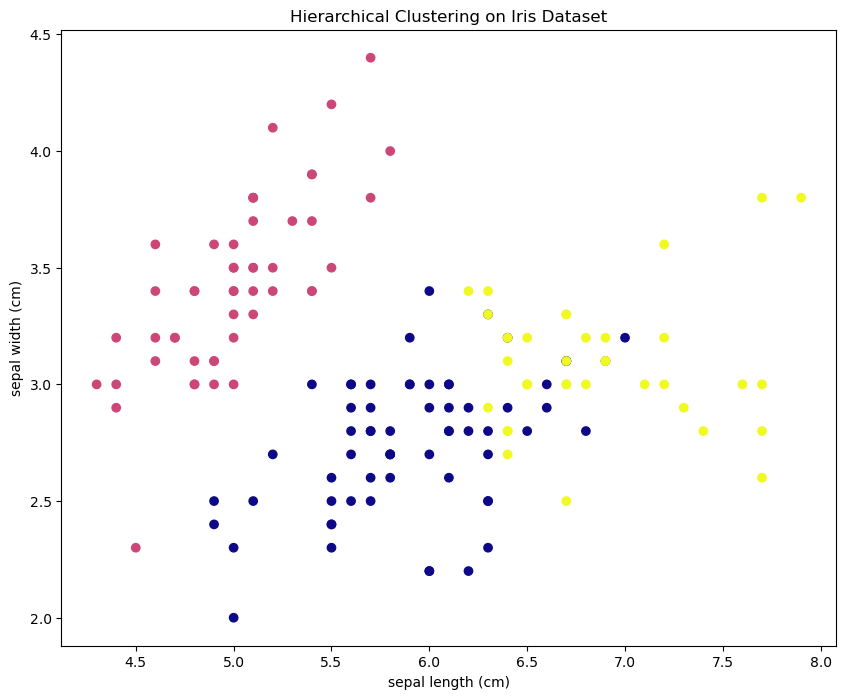

In [167]:
plt.figure(figsize=(10, 8))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df['Hierarchical_Cluster'], cmap="plasma")
plt.title("Hierarchical Clustering on Iris Dataset")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

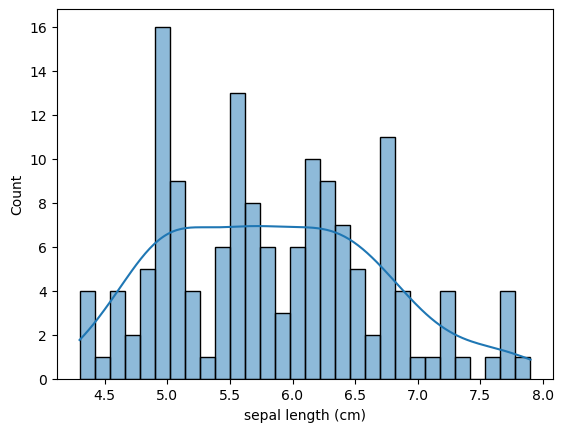

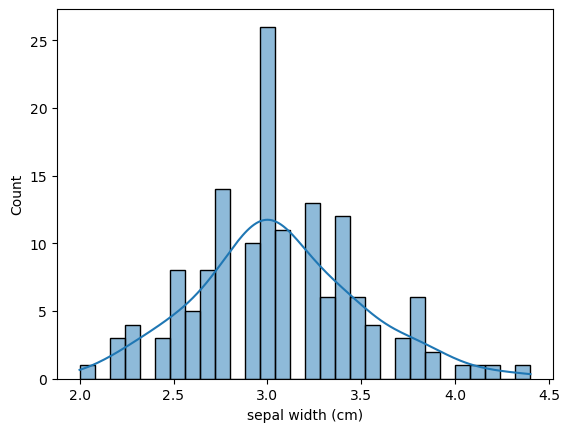

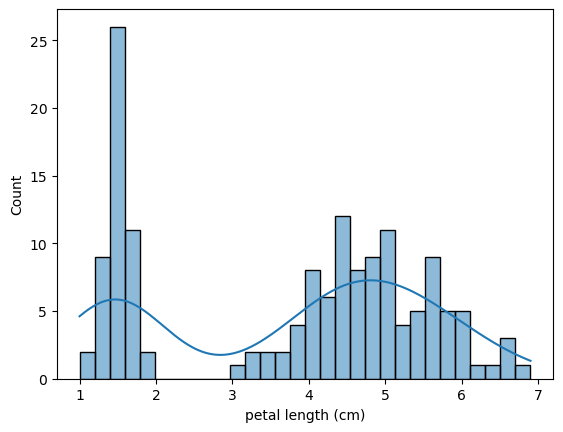

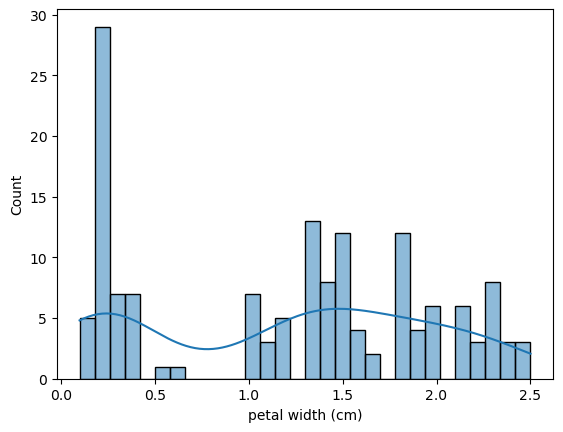

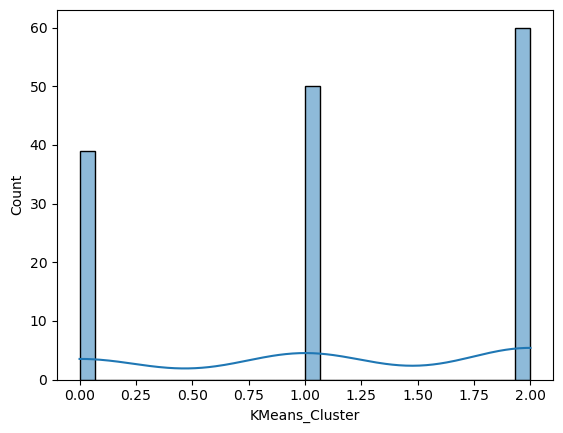

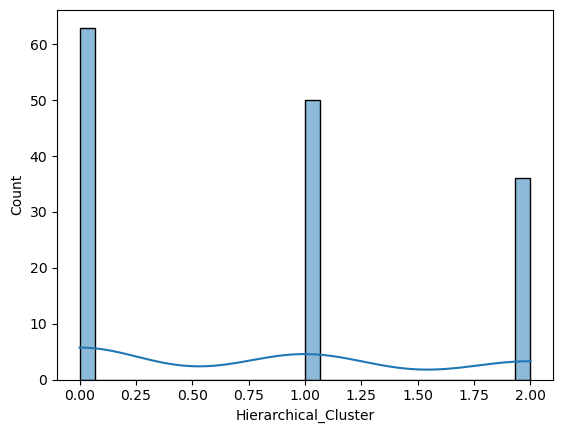

In [169]:
for i in df.select_dtypes(include="number").columns:
    sns.histplot(data=df,x=i,bins=30,kde="true")
    plt.show()

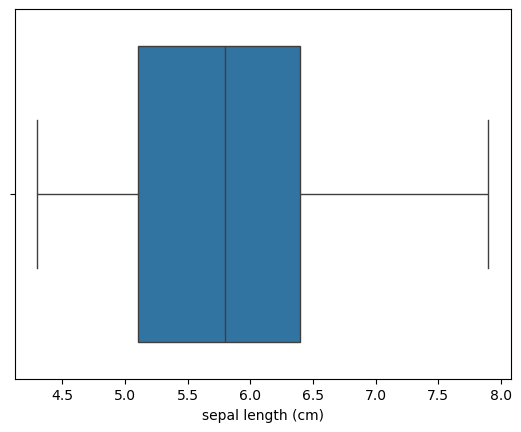

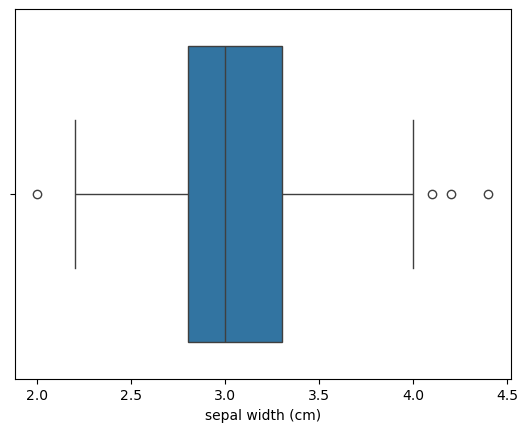

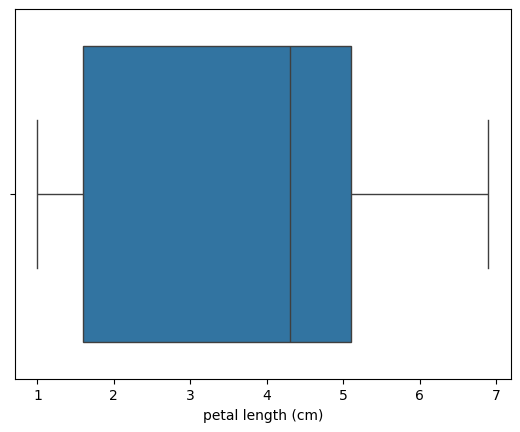

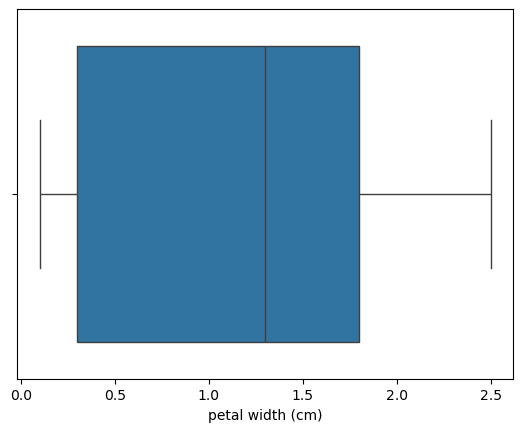

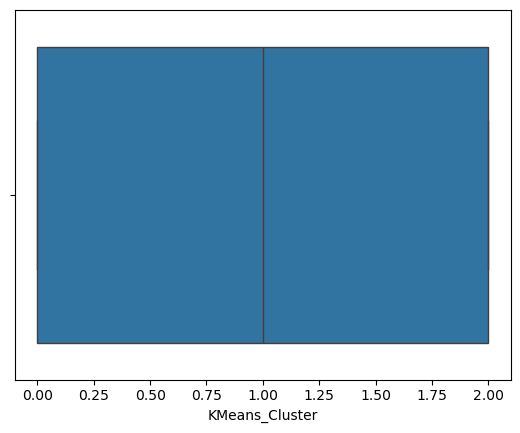

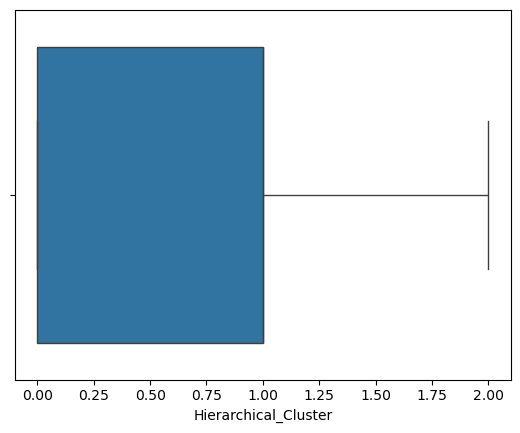

In [173]:
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df,x=i)
    plt.show()

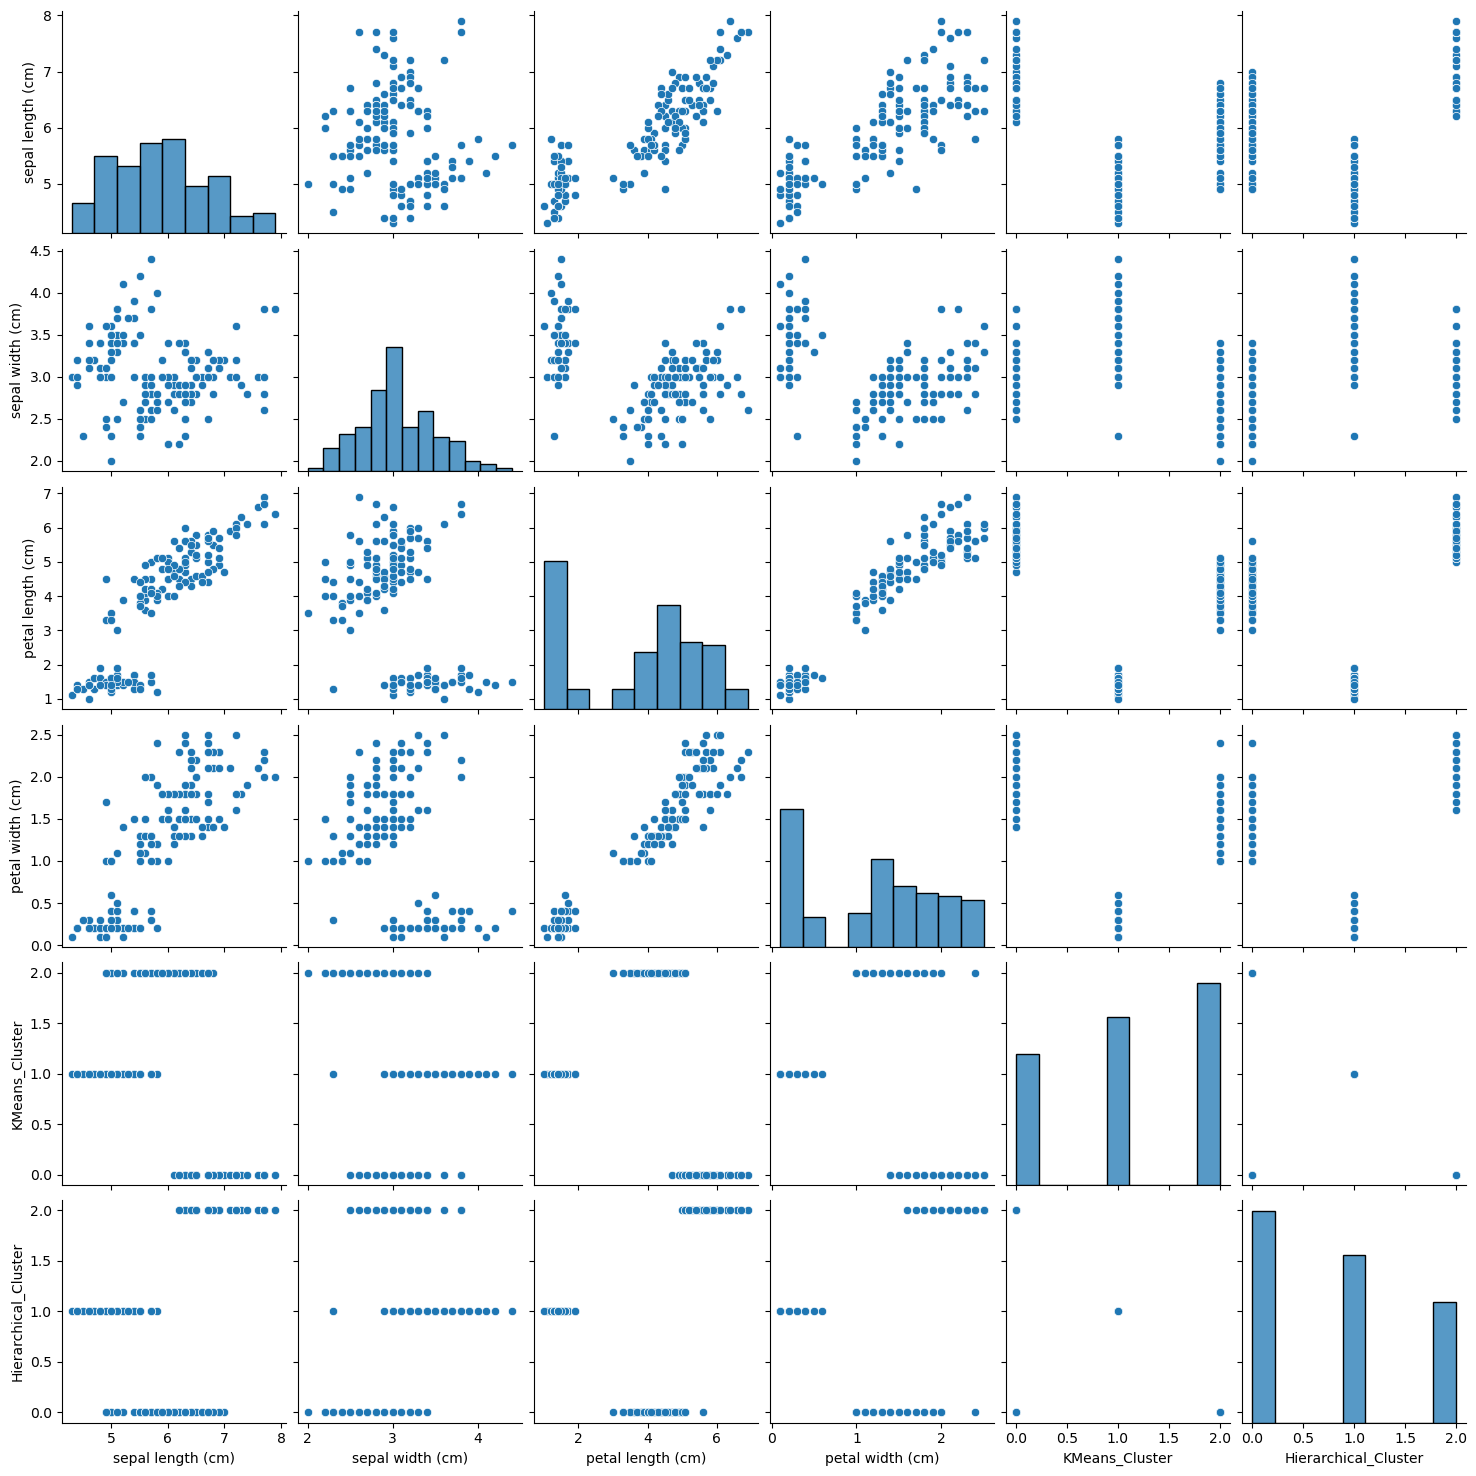

In [176]:
sns.pairplot(df)
plt.show()

In [182]:
s=df.select_dtypes(include="number").corr()
s

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),KMeans_Cluster,Hierarchical_Cluster
sepal length (cm),1.000000,-0.118129,0.873738,0.820620,-0.372679,0.326124
sepal width (cm),-0.118129,1.000000,-0.426028,-0.362894,-0.379733,0.394456
petal length (cm),0.873738,-0.426028,1.000000,0.962772,-0.185181,0.149178
petal width (cm),0.820620,-0.362894,0.962772,1.000000,-0.215430,0.201718
KMeans_Cluster,-0.372679,-0.379733,-0.185181,-0.215430,1.000000,-0.938210
Hierarchical_Cluster,0.326124,0.394456,0.149178,0.201718,-0.938210,1.000000


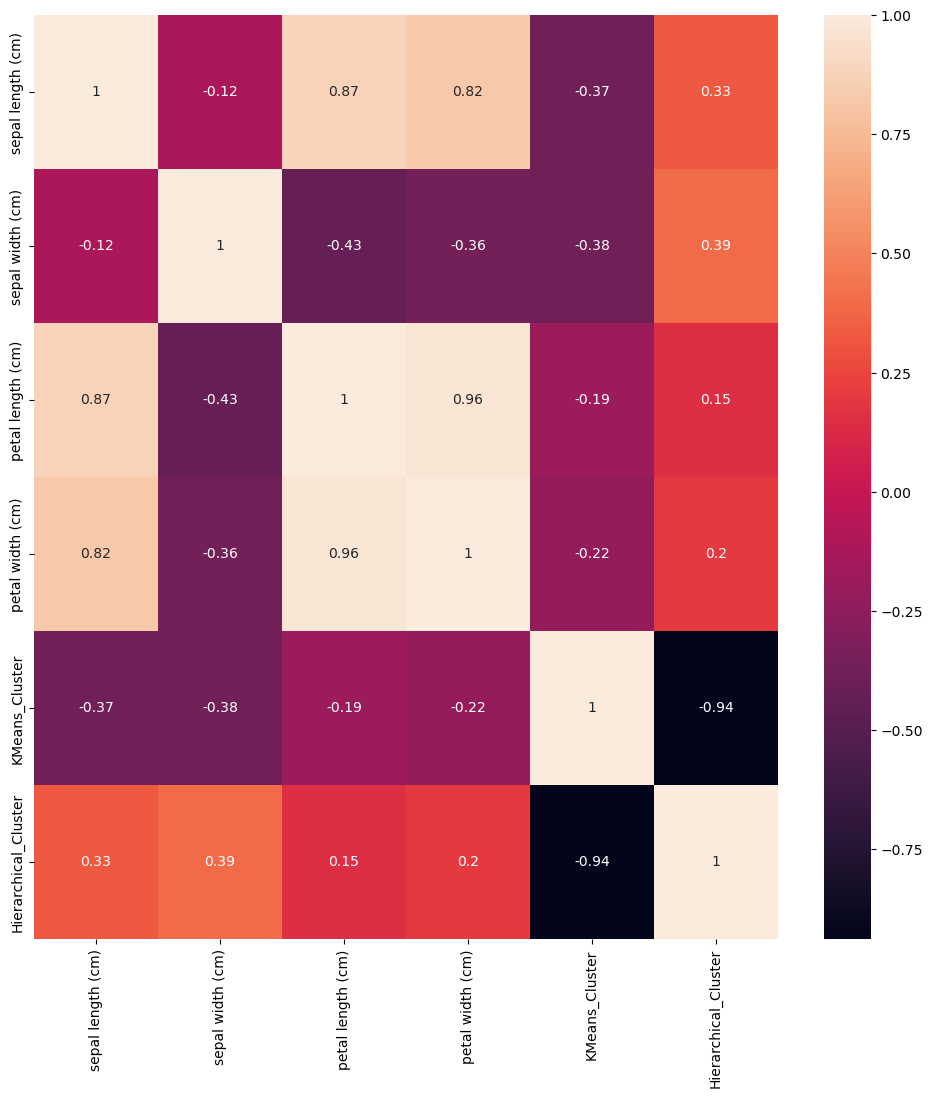

In [184]:
plt.figure(figsize=(12,12))
sns.heatmap(s, annot=True)
plt.show()